## Section 1: Importing all the necessary Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib  # For saving the model
import warnings
warnings.filterwarnings('ignore')

## Section 2: Data Loading and statistical Overview of the dataset

In [2]:
#Data Loading and Overview
df = pd.read_csv('Customer_Churn.csv')
print(df.head())  # Display first few rows
print( )
print(df.info()) # Check data types and missing values
print( )
print(df.describe()) # Displaying the statistical overview of the dataset


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# Displaying the first few rows of the dataset
print("First 10 rows of the dataset:")
print(df.head(10))


First 10 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone s

## Section 3: Data Cleaning

In [4]:
# Droping the 'customerID' column as it's not useful for analysis
df.drop('customerID', axis=1, inplace=True)

# Converting 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
# Checking  for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
# Droping rows with missing 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

# Reseting index after dropping rows
df.reset_index(drop=True, inplace=True)

In [7]:
# Maping 'Churn' column to binary values
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [8]:
# Encode binary categorical columns
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

In [9]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [10]:
# Verify data types and missing values after cleaning
print("\nData types after cleaning:")
print(df.dtypes)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Data types after cleaning:
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                     

### Section 4: Exploratory Data Analysis (EDA)

In [11]:
# determing the Churn Rate
churn_rate = df['Churn'].mean() * 100
print(f"\nChurn Rate: {churn_rate:.2f}%")


Churn Rate: 26.58%


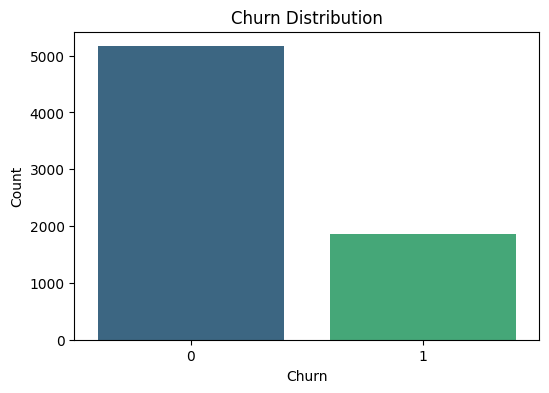

In [12]:
# Plotting Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


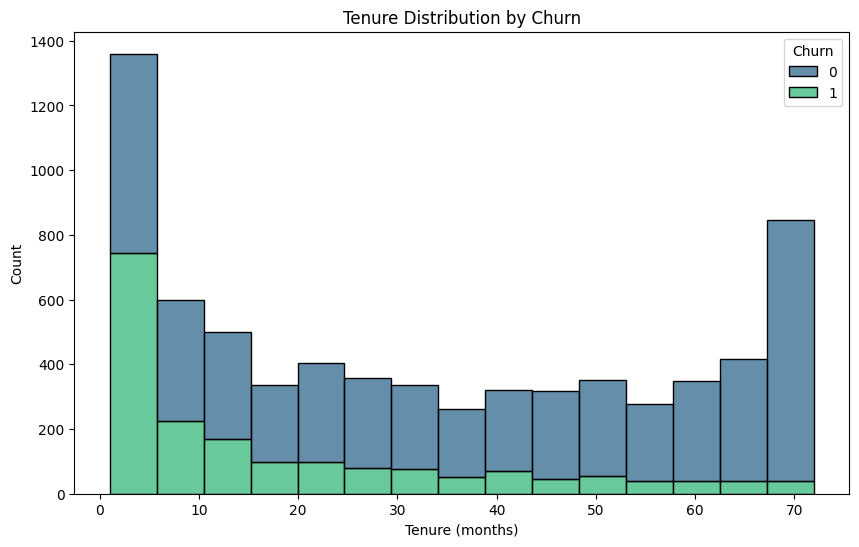

In [13]:
# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='viridis')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

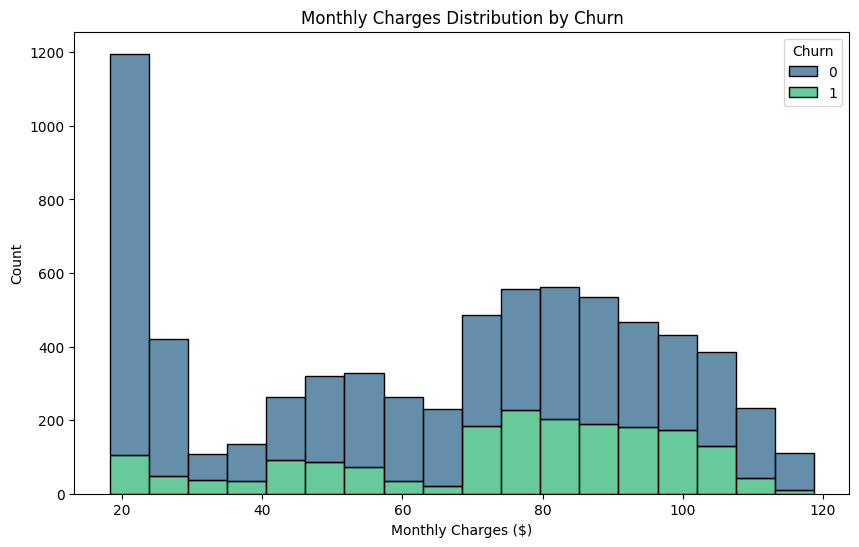

In [14]:

# Monthly Charges vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', palette='viridis')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()

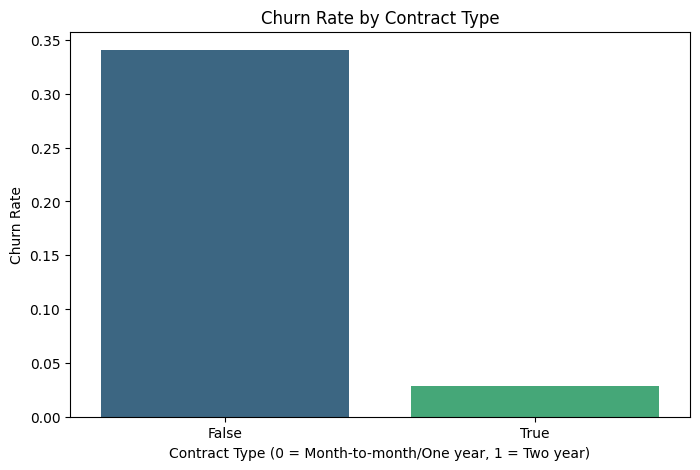

In [15]:
# Churn Rate by Contract Type
contract_churn = df.groupby('Contract_Two year')['Churn'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Contract_Two year', y='Churn', data=contract_churn, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type (0 = Month-to-month/One year, 1 = Two year)')
plt.ylabel('Churn Rate')
plt.show()

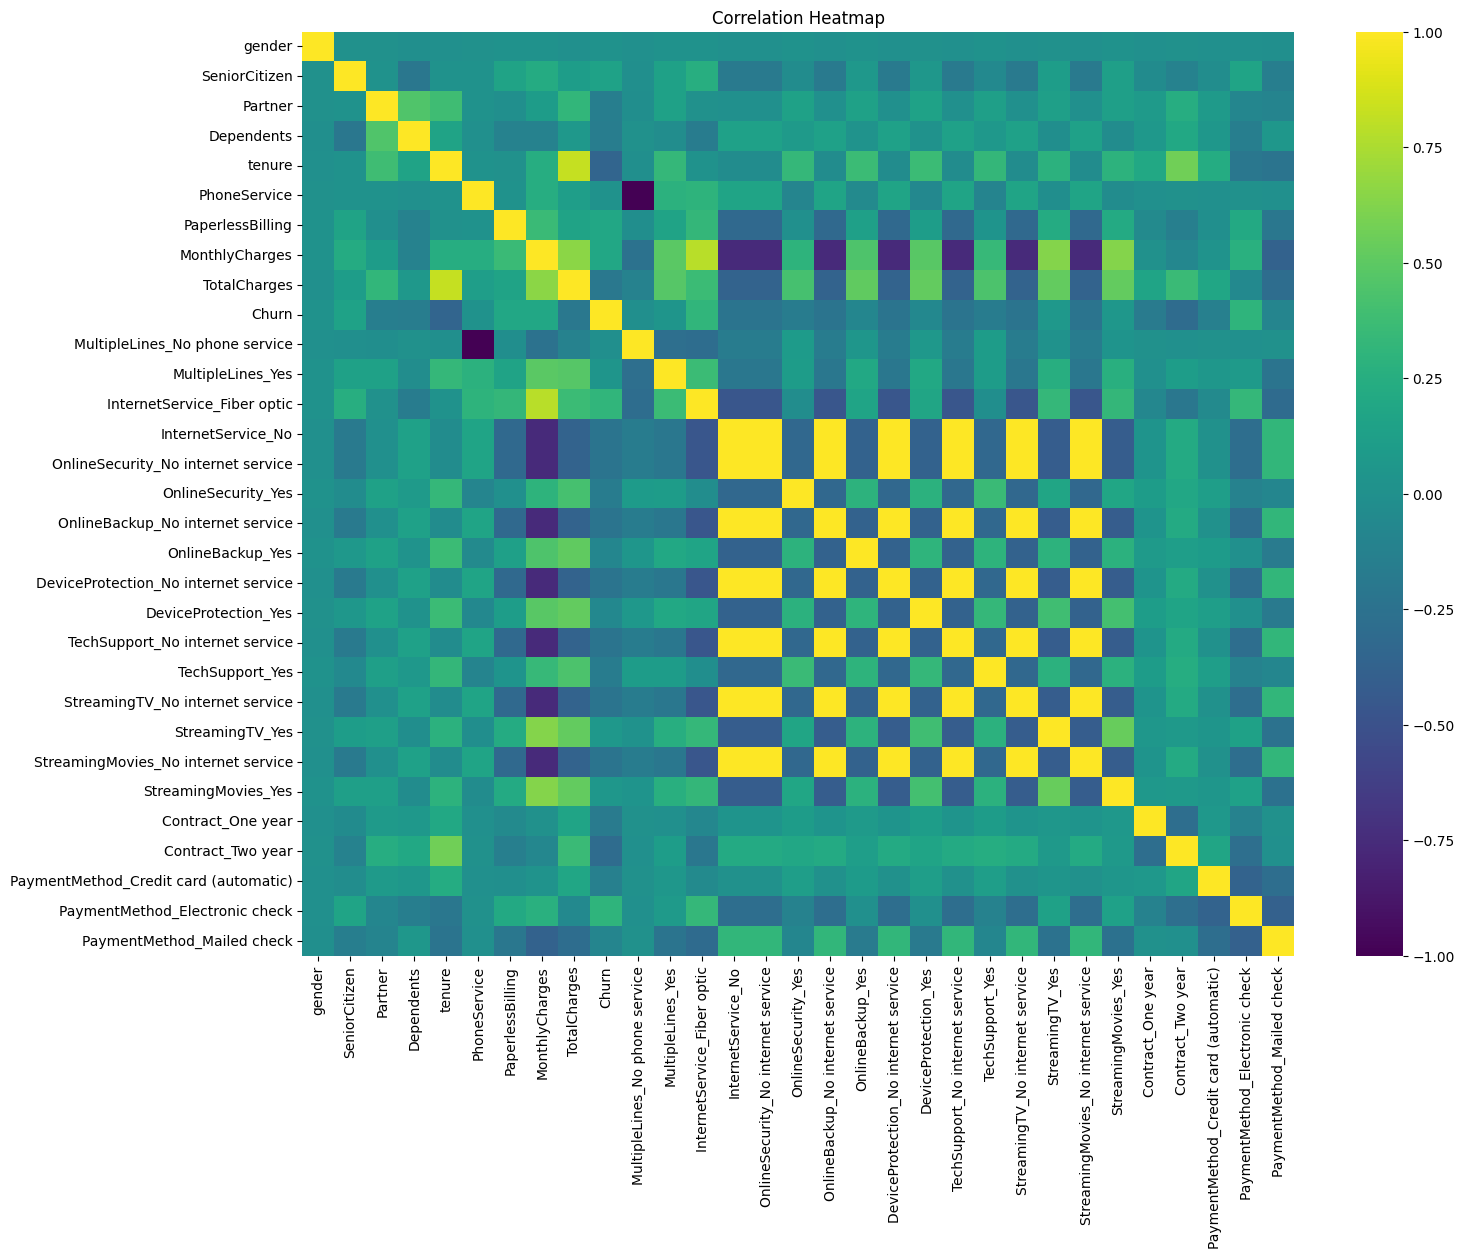

In [16]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

## Step 5: Training the Model

In [18]:
# Define features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [20]:
# Initializing the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
# Training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Step 6: Model Evaluation

In [22]:
# Converting 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)


In [23]:
# Predicting on test data
y_pred = model.predict(X_test)

In [24]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy*100:.2f}%")


Accuracy of the model: 78.67%


In [25]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1386  163]
 [ 287  274]]


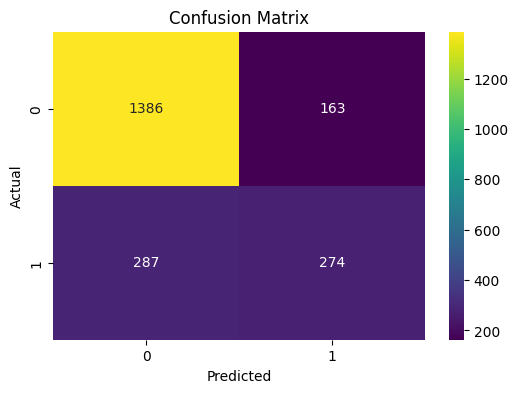

In [27]:
# Ploting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7867298578199052
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110

Confusion Matrix:
 [[1386  163]
 [ 287  274]]


In [29]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

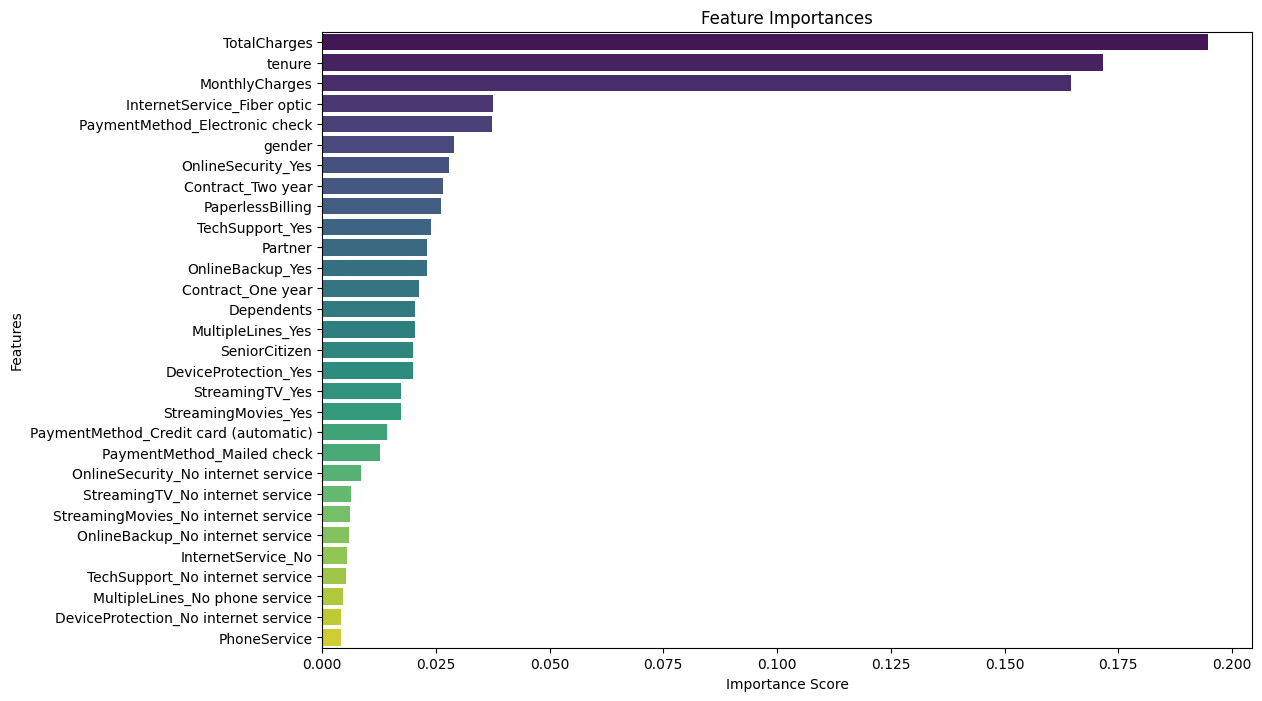

In [30]:
# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## Section 7: Saving the Model

In [31]:
joblib.dump(model, 'customer_churn_model.pkl')
print("Model saved as 'customer_churn_model.pkl'")


Model saved as 'customer_churn_model.pkl'
